In [55]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [56]:
class GuessState(TypedDict):
    guess: int # from user
    answer: int | None # generated by node
    count: int | None
    min: int | None
    max: int | None
    result: Literal["won", "lost"]

In [57]:
from random import randint
def pick(state: GuessState) -> GuessState:
    if state['count'] == None:
        state['count'] = 1
    else:
        state['count'] += 1
    state['answer'] = randint(1,10)
    return state
    
    

In [58]:
def announce(state: GuessState) -> GuessState:
    if state['answer'] == state['guess']:
        state['result'] = "won"
    return state

In [59]:
from typing import Literal
def should_continue(state: GuessState) -> Literal["exit", "continue"]:
    if state["count"] == 5:
        return "exit"
    if state["answer"] == state["guess"]:
        return "exit"
    return "continue"

In [60]:
graph_builer: StateGraph = StateGraph(GuessState)
graph_builer.add_node("pickanswer", pick)
graph_builer.add_edge(START, "pickanswer")
graph_builer.add_node("results",announce)
graph_builer.add_edge("results", END)
graph_builer.add_conditional_edges(
    "pickanswer",
    should_continue,
    {
        "exit": "results",
        "continue": "pickanswer"
    }
)
guess_graph = graph_builer.compile()

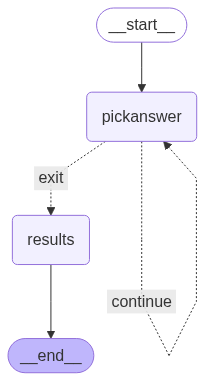

In [61]:
from IPython.display import Image, display
display(Image(guess_graph.get_graph().draw_mermaid_png()))

In [66]:
result = guess_graph.invoke(GuessState(guess=4, count=0, min=0, max=10, result="lost"))
print(result)

{'guess': 4, 'answer': 7, 'count': 5, 'min': 0, 'max': 10, 'result': 'lost'}
